# 1. Perform Exploratory data analysis

In [25]:
# Load the data

import pandas as pd

data = pd.read_csv("cancer.csv")

# Display the imported data
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [26]:
# Display the summary statistics 
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Question: What can you conclude from methods of central tendency and deviation of
the variables?

The 50th percentile is the median, and tells us the value that separates the population into a top half and a bottom half. The variables Age, Year and Survival have the least dispersion among data values. The Auxillary nodes has the highest amount of variation of data values. 

--------------------------------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>


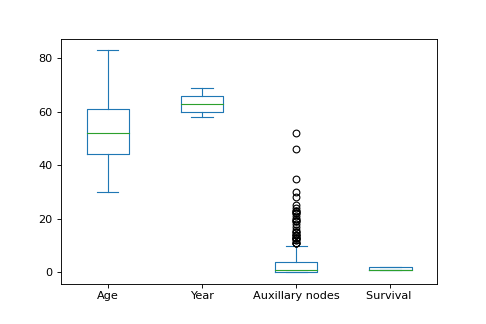

<IPython.core.display.Javascript object>


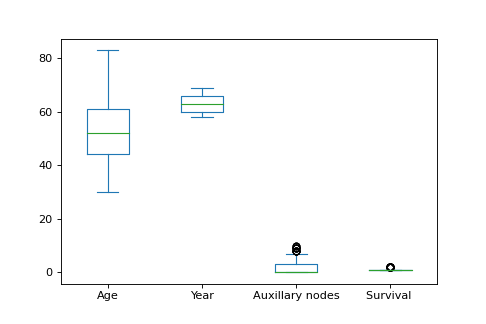

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


In [52]:
# Box plot visual

%matplotlib notebook

data.plot.box()

# Removing Outliers

# Max = 75% + 1.5* (75% - 25%)
maximum = 4 + 1.5 * (4 - 0)

new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()

# Correlation 

corr = new_data.corr()
corr



<AxesSubplot:>

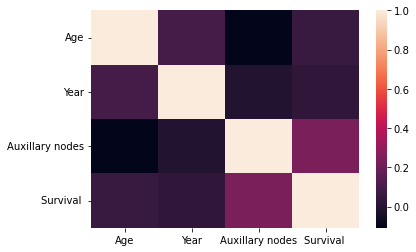

In [53]:
# Visualization - correlation

%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

# corr.corr().style.background_gradient(cmap="Blues")

sns.heatmap(corr)

Question: Are there any correlated variables?

Based on the heatmap visualization in the previous code block. No strong correlation exists for any of the variables in this dataset. 

Question: Interpret the skewness of the variables.

Age variable has a fairly symmetrical skewness.
Year variable has a fairly symmetrical skewness.
Auxillary nodes variable has a positive skewness because the data are positively skewed or skewed right, the right tail is longer.
Survival variable has a fairly symmetrical skewness.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

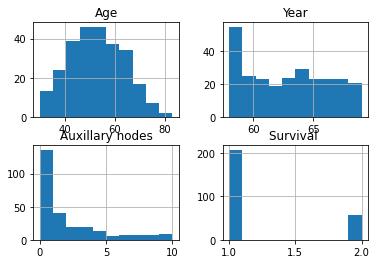

In [55]:
new_data.hist()

# 2. Develop Supervised learning models.

Logistic Regression

In [128]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#import data csv 
cancer_data = pd.read_csv("cancer.csv")
cancer_data.head()

#assign variables
X = cancer_data.drop(columns = ['Survival '])
y = cancer_data['Survival ']

# #Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

# #Train model using training data
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)

#Prediction
predict = LogReg.predict([[90,2,1]])
predict

array([1], dtype=int64)